# Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y

## Table of contents

1. Import Libraries
2. Load Data
3. Data Analysis
4. Data Preprocessing
5. Train Model
    - Generate poly features
    - Train model
6. Test Model on `x_test`
7. Calculate R2 Score
8. Calculate Mean Square Error
9. Test Model on custom data
10. Get Model Parameters

## 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

## 2) Load Data

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## 3) Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


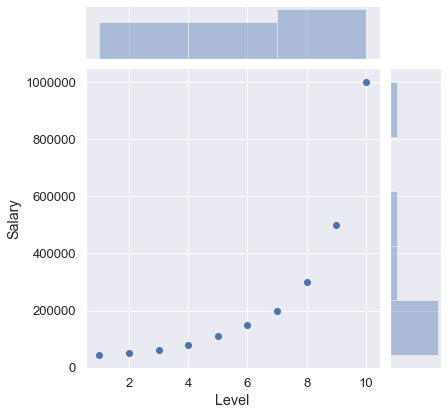

In [5]:
sns.jointplot(x='Level', y='Salary', data=df)

## 4) Data Preprocessing

In [6]:
x = df['Level'].values.reshape(-1, 1)
y = df['Salary']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 5) Train Model

### 5.1) Generate poly features

In [8]:
poly = PolynomialFeatures(degree=5)

In [9]:
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [10]:
x_train

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]], dtype=int64)

In [11]:
x_train_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04]])

### 5.2) Train model

In [12]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

## 6) Test Model on `x_test`

In [13]:
y_pred = model.predict(x_test_poly)
y_pred

array([523466.91614035,  53660.36199637, 147871.86071235])

In [14]:
y_test

8    500000
1     50000
5    150000
Name: Salary, dtype: int64

## 7) Calculate R2 Score

In [15]:
model.score(x_train_poly, y_train)

0.9999995602139142

In [16]:
model.score(x_test_poly, y_test)

0.9949078503291597

## 8) Calculate Mean Square Error

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

13767.39360361399

## 9) Test Model on custom data

In [19]:
model.predict(poly.fit_transform([[11]]))

array([1929485.42306565])

## 10) Get Model Parameters

In [20]:
model.coef_

array([     0.        , 108270.75256055, -68211.7781771 ,  19863.13924498,
        -2516.26460639,    120.50505209])

In [21]:
model.intercept_

-12535.072340690938

In [22]:
pd.DataFrame(model.coef_, poly.get_feature_names(), columns=["Coeff"])

,Coeff
1,0.000000
x0,108270.752561
x0^2,-68211.778177
x0^3,19863.139245
x0^4,-2516.264606
x0^5,120.505052


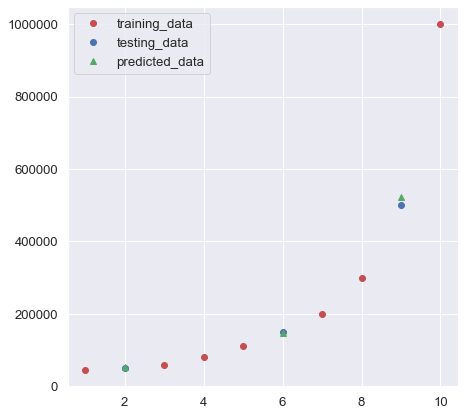

In [23]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g^', label='predicted_data')
plt.legend()

# Great Work!